In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_log_error,mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [125]:
df1=pd.read_csv('Admission_Predict_Ver1.1.csv')
print(df1.shape)
df1.head()

(500, 9)


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [126]:
df1.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [127]:
df1.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [128]:
df1.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

<AxesSubplot:xlabel='GRE Score'>

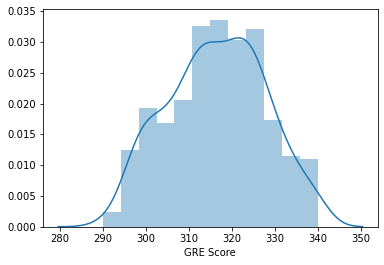

In [129]:
sns.distplot(df1['GRE Score'])

<AxesSubplot:xlabel='TOEFL Score'>

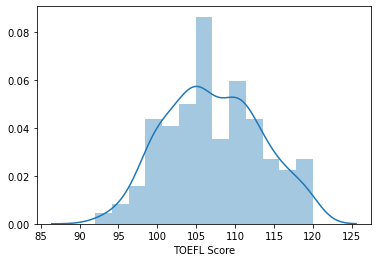

In [130]:
sns.distplot(df1['TOEFL Score'])

<AxesSubplot:xlabel='University Rating'>

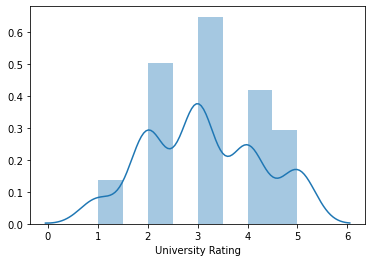

In [131]:
sns.distplot(df1['University Rating'])

<AxesSubplot:xlabel='SOP'>

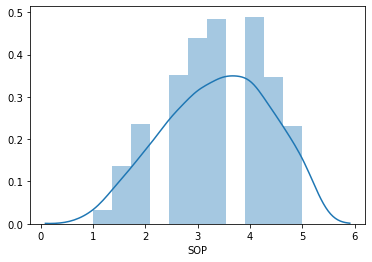

In [132]:
sns.distplot(df1['SOP'])

<AxesSubplot:xlabel='CGPA'>

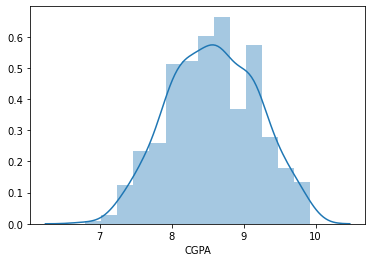

In [133]:
sns.distplot(df1['CGPA'])

<AxesSubplot:xlabel='Research'>

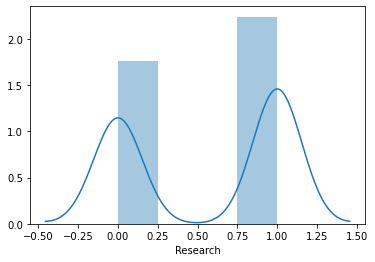

In [134]:
sns.distplot(df1['Research'])

<AxesSubplot:xlabel='LOR '>

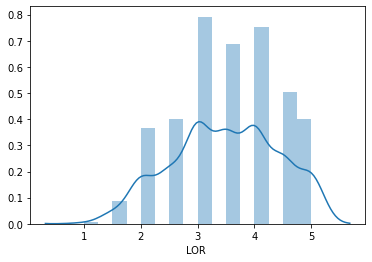

In [135]:
sns.distplot(df1['LOR '])

<AxesSubplot:xlabel='Chance of Admit '>

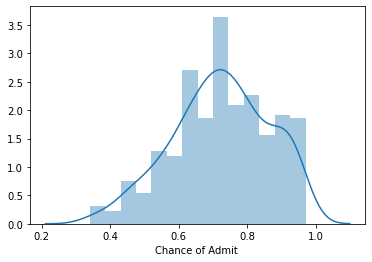

In [136]:
sns.distplot(df1['Chance of Admit '])

In [137]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [138]:
x=df1.drop(labels=['Serial No.','Chance of Admit '],axis=1)
y=df1['Chance of Admit ']
x.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


In [139]:
import statsmodels.api as sm
x=sm.add_constant(x)
x.head()

,const,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1.0,337,118,4,4.5,4.5,9.65,1
1,1.0,324,107,4,4.0,4.5,8.87,1
2,1.0,316,104,3,3.0,3.5,8.00,1
3,1.0,322,110,3,3.5,2.5,8.67,1
4,1.0,314,103,2,2.0,3.0,8.21,0


In [140]:
model=sm.OLS(y,x).fit()

In [141]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Chance of Admit    R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     324.4
Date:                Fri, 25 Sep 2020   Prob (F-statistic):          8.21e-180
Time:                        13:41:52   Log-Likelihood:                 701.38
No. Observations:                 500   AIC:                            -1387.
Df Residuals:                     492   BIC:                            -1353.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.2757      0.104    -12.232      0.000      -1.481      -1.071
GRE Score             0.0019      0.001      3.700      0.000       0.001       0.003
TOEFL Score           0.0028      0.001      3.184      0.002       0.001       0.004
University Rating     0.0059      0.004      1.563      0.119      -0.002       0.013
SOP                   0.0016      0.005      0.348      0.728      -0.007       0.011
LOR                   0.0169      0.004      4.074      0.000       0.009       0.025
CGPA                  0.1184      0.010     12.198      0.000       0.099       0.137
Research              0.0243      0.007      3.680      0.000       0.011       0.037
==============================================================================
Omnibus:                      112.770   Durbin-Watson:                   0.796
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              262.104
Skew:                          -1.160   Prob(JB):                     1.22e-57
Kurtosis:                       5.684   Cond. No.                     1.30e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [142]:
x.corr()

,const,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
const,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GRE Score,NaN,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398
TOEFL Score,NaN,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012
University Rating,NaN,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047
SOP,NaN,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116
LOR,NaN,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526
CGPA,NaN,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311
Research,NaN,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000


<AxesSubplot:>

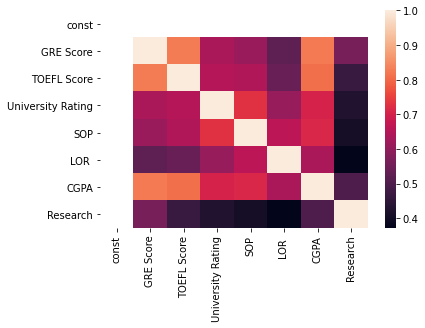

In [143]:
sns.heatmap(x.corr())

In [144]:
x.drop(labels=['TOEFL Score'],axis=1).corr()

,const,GRE Score,University Rating,SOP,LOR,CGPA,Research
const,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GRE Score,NaN,1.000000,0.635376,0.613498,0.524679,0.825878,0.563398
University Rating,NaN,0.635376,1.000000,0.728024,0.608651,0.705254,0.427047
SOP,NaN,0.613498,0.728024,1.000000,0.663707,0.712154,0.408116
LOR,NaN,0.524679,0.608651,0.663707,1.000000,0.637469,0.372526
CGPA,NaN,0.825878,0.705254,0.712154,0.637469,1.000000,0.501311
Research,NaN,0.563398,0.427047,0.408116,0.372526,0.501311,1.000000


In [145]:
x=x.drop(labels=['TOEFL Score','const'],axis=1)
x.head()

,GRE Score,University Rating,SOP,LOR,CGPA,Research
0,337,4,4.5,4.5,9.65,1
1,324,4,4.0,4.5,8.87,1
2,316,3,3.0,3.5,8.00,1
3,322,3,3.5,2.5,8.67,1
4,314,2,2.0,3.0,8.21,0


In [146]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [147]:
cols=np.array(['GRE Score', 'University Rating', 'SOP',
       'LOR', 'CGPA', 'Research'])
print(cols)

['GRE Score' 'University Rating' 'SOP' 'LOR' 'CGPA' 'Research']


In [148]:
print(x_train.shape)
print(x_test.shape)

(375, 6)
(125, 6)


In [149]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(x_train)
scaler_x_train=scaler.transform(x_train)
scaler_x_test=scaler.transform(x_test)
scaler_x_train=pd.DataFrame(scaler_x_train,columns=cols)
scaler_x_test=pd.DataFrame(scaler_x_test,columns=cols)
scaler_x_train.head()

,GRE Score,University Rating,SOP,LOR,CGPA,Research
0,0.404255,0.25,0.625,0.428571,0.554487,0.0
1,0.489362,0.50,0.625,0.142857,0.282051,0.0
2,0.872340,1.00,0.750,1.000000,0.983974,1.0
3,0.638298,0.50,0.750,0.428571,0.807692,1.0
4,0.085106,0.25,0.375,0.000000,0.349359,0.0


In [150]:
scaler_x_test.head()

,GRE Score,University Rating,SOP,LOR,CGPA,Research
0,0.872340,0.75,0.750,0.571429,0.878205,1.0
1,0.446809,0.75,0.875,0.714286,0.717949,1.0
2,0.468085,0.25,0.250,0.285714,0.272436,0.0
3,0.404255,0.50,0.500,0.428571,0.605769,0.0
4,0.702128,0.50,0.625,0.428571,0.721154,1.0


In [152]:
linReg=LinearRegression(n_jobs=-1)
linReg.fit(scaler_x_train,y_train)
y_pred=linReg.predict(scaler_x_test)

In [153]:
r2Score=r2_score(y_test,y_pred)
print('r2Score is ',r2Score)

r2Score is  0.818757862853788


In [154]:
linReg.coef_

array([0.14525162, 0.01403808, 0.01299692, 0.05863859, 0.39505439,
       0.02268246])

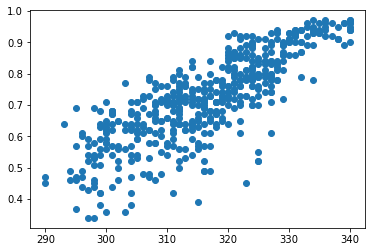

In [157]:
plt.scatter(df1['GRE Score'],df1['Chance of Admit '])

In [168]:
linReg.coef_

array([0.14525162, 0.01403808, 0.01299692, 0.05863859, 0.39505439,
       0.02268246])

In [175]:
import joblib
joblib.dump(linReg,'SimpleLinearRegression.pkl')

['SimpleLinearRegression.pkl']

In [176]:
sample_test=joblib.load('SimpleLinearRegression.pkl')
print(len(sample_test.predict(scaler_x_test)))

125


In [177]:
joblib.dump(scaler,'SimpleLinearRegression_Scaler.pkl')

['SimpleLinearRegression_Scaler.pkl']

In [178]:
pkl_scaler=joblib.load('SimpleLinearRegression_Scaler.pkl')
print(pkl_scaler)

MinMaxScaler()
